In [5]:
# Import libraries
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

In [23]:
datafile = "/Users/justinpassek/Documents/ToothGrowth.csv"
data = pd.read_csv(datafile)
data.head()

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5


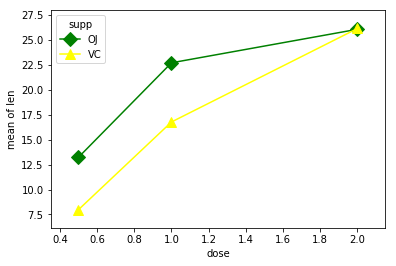

In [25]:
fig = interaction_plot(data.dose
                      ,data.supp
                      ,data.len
                      ,colors = ['green','yellow']
                      ,markers = ['D','^']
                      ,ms=10)

In [53]:
# Degrees of Freedom
N = len(data.len)
print("N is %s" % N)

df_a = len(data.supp.unique()) - 1
print("df_a is %s" % df_a)

df_b = len(data.dose.unique()) - 1
print("df_b is %s" % df_b)

df_axb = df_a*df_b
print("df_axb is %s" % df_axb)

df_w = N - (len(data.supp.unique())*len(data.dose.unique()))
print("df_w is %s" % df_w)

N is 60
df_a is 1
df_b is 2
df_axb is 2
df_w is 54


In [59]:
#Sum of Squares
grand_mean = data['len'].mean()
print("Grand mean is %s" % grand_mean)

ssq_a = sum([(data[data.supp ==l].len.mean()-grand_mean)**2 for l in data.supp])
print("Sum of Squares SUPP is %s" % ssq_a)

ssq_b = sum([(data[data.dose ==l].len.mean()-grand_mean)**2 for l in data.dose])
print("Sum of Squares DOSE is %s" % ssq_b)

ssq_t = sum((data.len - grand_mean)**2)
print("Sum of Squares Total is %s" % ssq_t)

Grand mean is 18.813333333333336
Sum of Squares SUPP is 205.35000000000005
Sum of Squares DOSE is 2426.434333333332
Sum of Squares Total is 3452.2093333333332


In [65]:

vc = data[data.supp == 'VC']
print(vc)

oj = data[data.supp == 'OJ']
print(oj)

vc_dose_means = [vc[vc.dose == d].len.mean() for d in vc.dose]
print(vc_dose_means)

oj_dose_means = [oj[oj.dose == d].len.mean() for d in oj.dose]
print(oj_dose_means)

ssq_w = sum((oj.len - oj_dose_means)**2) +sum((vc.len - vc_dose_means)**2)
print(ssq_w)

    Unnamed: 0   len supp  dose
0            1   4.2   VC   0.5
1            2  11.5   VC   0.5
2            3   7.3   VC   0.5
3            4   5.8   VC   0.5
4            5   6.4   VC   0.5
5            6  10.0   VC   0.5
6            7  11.2   VC   0.5
7            8  11.2   VC   0.5
8            9   5.2   VC   0.5
9           10   7.0   VC   0.5
10          11  16.5   VC   1.0
11          12  16.5   VC   1.0
12          13  15.2   VC   1.0
13          14  17.3   VC   1.0
14          15  22.5   VC   1.0
15          16  17.3   VC   1.0
16          17  13.6   VC   1.0
17          18  14.5   VC   1.0
18          19  18.8   VC   1.0
19          20  15.5   VC   1.0
20          21  23.6   VC   2.0
21          22  18.5   VC   2.0
22          23  33.9   VC   2.0
23          24  25.5   VC   2.0
24          25  26.4   VC   2.0
25          26  32.5   VC   2.0
26          27  26.7   VC   2.0
27          28  21.5   VC   2.0
28          29  23.3   VC   2.0
29          30  29.5   VC   2.0
    Unna

In [68]:
# Sum of Squares interaction
ssq_axb = ssq_t-ssq_a-ssq_b-ssq_w
print(ssq_axb)

108.31900000000155


In [69]:
# Mean squares
ms_a = ssq_a/df_a
print(ms_a)

ms_b = ssq_b/df_b
print(ms_b)

ms_axb = ssq_axb/df_axb
print(ms_axb)

ms_w = ssq_w/df_w
print(ms_w)

205.35000000000005
1213.217166666666
54.159500000000776
13.187148148148149


In [73]:
# F-statistic
f_a = ms_a/ms_w
print(f_a)

f_b = ms_b/ms_w
print(f_b)

f_axb = ms_axb/ms_w
print(f_axb)

15.571979452497244
91.99996489286701
4.106991094022578


In [75]:
# P-values
p_a = stats.f.sf(f_a, df_a, df_w)
print(p_a)

p_b = stats.f.sf(f_b, df_b, df_w)
print(p_b)

p_axb = stats.f.sf(f_axb, df_axb, df_w)
print(p_axb)

0.00023118280977342404
4.046291195992279e-18
0.021860268964789892


In [78]:
# Table
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']
 
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['supp', 'dose', 
                          'supp:dose', 'Residual'])

print(aov_table1)

                sum_sq  df        F       PR(>F)
supp        205.350000   1   15.572  0.000231183
dose       2426.434333   2       92  4.04629e-18
supp:dose   108.319000   2  4.10699    0.0218603
Residual    712.106000  54      NaN          NaN


In [79]:
# Table with effect sizes
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov


eta_squared(aov_table1)
omega_squared(aov_table1)
print(aov_table1)

                sum_sq  df        F       PR(>F)    eta_sq  omega_sq
supp        205.350000   1   15.572  0.000231183  0.059484  0.055452
dose       2426.434333   2       92  4.04629e-18  0.702864  0.692579
supp:dose   108.319000   2  4.10699    0.0218603  0.031377  0.023647
Residual    712.106000  54      NaN          NaN       NaN       NaN
